## Investigating Movie Duration Trends and Short Action Movies from the 1990s Netflix Catalog

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# import DataFrame
netflix = pd.read_csv(r"C:\Users\NEW USER\anaconda_projects\netflix_data.csv")

#Getting to know my data
netflix.info()

# Gaining a quick understanding of data included in numerical columns 
print(netflix.describe())

# validating our release_year and duration column
print(netflix["release_year"].min())
print(netflix["release_year"].max())
print(netflix["duration"].min())
print(netflix["duration"].max())

#checking for missing values
print(netflix.isna().any())

#Number of data points in each category
print(netflix.value_counts("type"))
print(netflix.value_counts("genre"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB
       release_year     duration
count   4812.000000  4812.000000
mean    2012.711554    99.566708
std        9.517978    30.889305
min     1942.000000     1.000000
25%     2011.000000    88.000000
50%     2016.000000    99.000000
75%     2018.000000   116.000000
max     2021.000000   253.00000

### The most frequent movie duration in the 1990s

     show_id   type                   title                director  \
4262   s6851  Movie  The School of Mischief  Houssam El-Din Mustafa   
2811   s4491  Movie          No Longer kids         Samir Al Asfory   
3349   s5377  Movie                  Sangam              Raj Kapoor   

                                                   cast country  \
4262  Suhair El-Babili, Adel Emam, Saeed Saleh, Youn...   Egypt   
2811  Said Saleh, Hassan Moustafa, Ahmed Zaki, Youne...   Egypt   
3349  Raj Kapoor, Vyjayanthimala, Rajendra Kumar, La...   India   

             date_added  release_year  duration  \
4262       May 21, 2020          1973       253   
2811       May 21, 2020          1979       237   
3349  December 31, 2019          1964       228   

                                            description           genre  
4262  A high school teacher volunteers to transform ...        Comedies  
2811  Hoping to prevent their father from skipping t...        Comedies  
3349  Returning hom

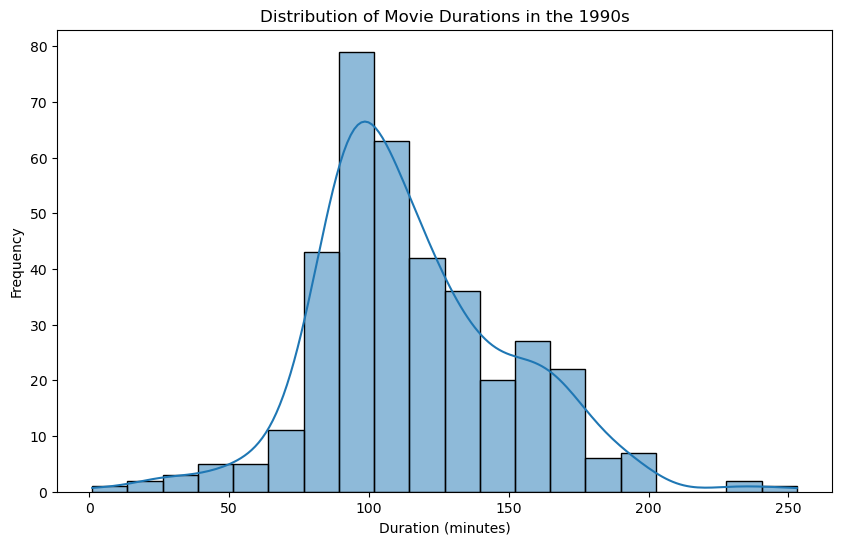

In [8]:
# most frequent movie duration in the 1990s
frequent_movie_duration = netflix[netflix["release_year"] <= 1999].sort_values("duration", ascending = False)
print(frequent_movie_duration.head(3))

# Visual of 1990s movie duration
plt.figure(figsize=(10, 6))
sns.histplot(frequent_movie_duration["duration"], bins=20, kde=True)
plt.title('Distribution of Movie Durations in the 1990s')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

### The Count of short action movies released in the 1990s

     show_id   type                         title                director  \
917    s1415  Movie               Cleopatra Jones           Jack Starrett   
1288   s2039  Movie     EVANGELION: DEATH (TRUE)²            Hideaki Anno   
1390   s2213  Movie           Flying Guillotine 2    Kang Cheng, Shan Hua   
1698   s2708  Movie                          Hero              Corey Yuen   
2328   s3718  Movie             Look Out, Officer              Sze Yu Lau   
2887   s4618  Movie            On the Wrong Track  Clarence Yiu-leung Fok   
2926   s4676  Movie  Opium and the Kung Fu Master               Chia Tang   
2993   s4787  Movie                  Passenger 57             Kevin Hooks   
3297   s5299  Movie           Rumble in the Bronx            Stanley Tong   

                                                   cast        country  \
917   Tamara Dobson, Bernie Casey, BrendaSykes, Esth...  United States   
1288  Megumi Ogata, Kotono Mitsuishi, Megumi Hayashi...          Japan   
1390  F

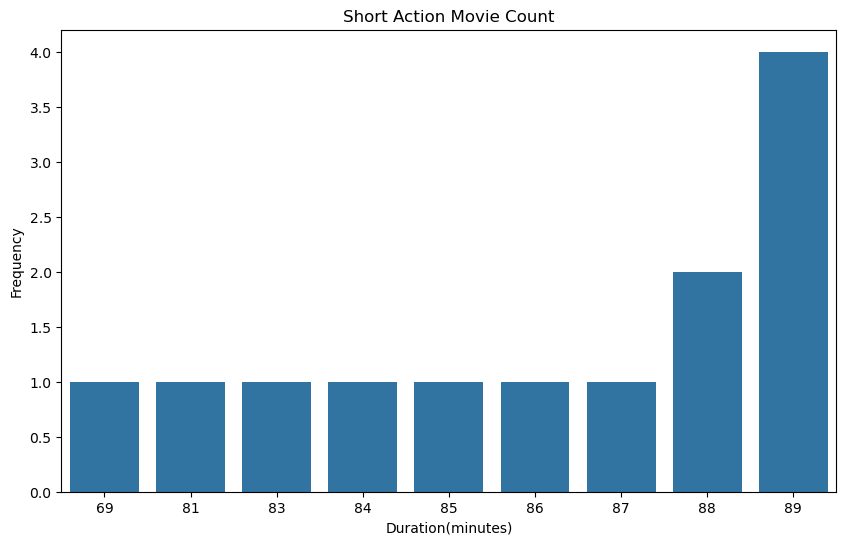

In [13]:
# Short action movies released in the 1990s
short_movie = netflix[(netflix["release_year"] <= 1999) & (netflix["genre"] == "Action") & (netflix["duration"] < 90)]
print(short_movie.head(9))

# Short action movie count
short_movie_count = short_movie[["duration"]].value_counts("duration")
print(short_movie_count)

# Visual of short action movie count
plt.figure(figsize=(10, 6))
sns.countplot(x="duration", data=short_movie)
plt.title("Short Action Movie Count")
plt.ylabel("Frequency")
plt.xlabel("Duration(minutes)")
plt.show()